# Hito 2
## Visualización de Información

## Proyecto:
# Analisis de metadatos de la UFC

in this project we will analyze the metadata of the UFC, we will use data from three kaggle datasets:

- [https://www.kaggle.com/datasets/danmcinerney/mma-differentials-and-elo] (mma-differentials-and-elo) let's call it "elo"
- [https://www.kaggle.com/datasets/mdabbert/ufc-fights-2010-2020-with-betting-odds](ufc-fights-2010-2020-with-betting-odds) let's call it "odds"
- [https://www.kaggle.com/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024](ufc-complete-dataset-all-events-1996-2024) let's call it "events"

### elo
##MMA Differentials and Elo

About Dataset
MMA-AI.net

This dataset uses ufcstats.com. For each fight, we calculated the technique differential between the opponents and also the fighter's historical average technique differential.

Differential stats are calculated by diving the two individual's technique stats. For example, if Conor hits Khabib 10 times, and Khabib hits Conor 5 times, then Conor's differential stat is 10/5 = 2. Khabib's differential stat is 0.5.

This dataset tracks the following basic stats:

date
fight_url
event_url
result
fighter
opponent
division
stance
dob
method
total_comp_time
round
time
fighter_url
opponent_url
referee
time_format
reach
height
age
knockdowns
sub_attempts
reversals
control
takedowns_landed
takedowns_attempts
sig_strikes_landed
sig_strikes_attempts
total_strikes_landed
total_strikes_attempts
head_strikes_landed
head_strikes_attempts
body_strikes_landed
body_strikes_attempts
leg_strikes_landed
leg_strikes_attempts
distance_strikes_landed
distance_strikes_attempts
clinch_strikes_landed
clinch_strikes_attempts
ground_strikes_landed
ground_strikes_attempts
KO_losses
days_since_last_comp
lose_streak
win_streak
win_loss_ratio
total_comp_time
stamina
num_fights
trueskill
elo
It then parses those stats starting at reach and creates several new categories for each:

stat_differential
stat_per_min
stat_accuracy
stat_def
stat_peak
stat_valley
stat_vs_peak
stat_vs_valley
Then it further modifies those categories above with:

avg_stat
recent_avg_stat
Then for each of those it does:

change_stat
stat_vs_opp
Exploring the data

See all of Jon Jones' stats
df.loc[df['fighter'] == 'jon jones']

See all of Jon Jones' striking differential stats
df.loc[df['fighter'] == 'jon jones'].filter(like='sig_strikes_differential')

See Jon Jones' postfight Elo scores and who his opponents were
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'elo']]

See Jon Jones' postfight ground control time, average ground control, and peak ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'control', 'avg_control', 'control_peak']]

See Jon Jones' prefight average ground control vs his opponent's average ground control
df.loc[df['fighter'] == 'jon jones'].loc[:, ['opponent', 'precom_avg_control_vs_opp']]

### events
##UFC Complete Dataset (All events 1996-2024)

About Dataset

Project description
The UFC (Ultimate Fighting Championship) is an American mixed martial arts promotion company which is considered the biggest promotion in the MMA World. Soon they will host an anniversary event UFC 300. It is interesting to see what path the promotion has come from 1996 to this day. There are UFC datasets available in the Kaggle but all of them are outdated. For that matter I've decided to gather the new dataset which will include most of the useful stats you can do for various data analysis tasks and put my theoretical skills into practice. I've created a Python script to parse the ufcstats website and gather available data.

Currently 4 datasets are available

Large dataset
The biggest dataset yet with over 7000 rows and 95 different features to explore. Some of the ideas for projects with this dataset:

ML model for betting predictions;
Data analysis to compare different years, weight classes, fighters, etc;
In depth analysis of a specific fight or all fights of a selected fighter;
Visualisation of average stats (strikes, takedowns, subs) per weightclass, gender, years etc.

Medium dataset
Medium dataset for some basic tasks (contains 7582 rows and 19 columns). You can use it for getting a basic understanding of UFC historical data and perform different visualisations.

Small dataset
Contains the information with data about completed or upcoming events with only 683 rows and 3 columns


Fighter stats
A dataset with the stats for every fighter fought at the UFC event.


### odds
## UFC Fights (2010-2020) with betting odds

About Dataset
Context
There are some great UFC datasets out there, but I could not find one that included gambling odds…. So I went and made one myself. This dataset focuses very generally on the fights and hopes to be able to draw very broad conclusions. More a more in depth statistical fight analysis I would recommend Rajeev Warrier's excellent datasetwhich was the inspiration for my work.

Content
This dataset consists of 11 columns of data with basic information about every match that took place between March 21, 2010 and March 14, 2020.

Column Definitions:
R_fighter and B_fighter: The names of the fighter in the red corner and the fighter in the blue corner
R_odds and B_odds: The American odds of the fighter winning.
date: The date of the fight
location: The location of the fight
country: The country the fight occurred in
Winner: The winner of the fight ('Red' or 'Blue')
title_bout: Was this fight a title bout? ('True' or 'False')
weight_class: What weight class did this fight occur at?
gender: Male or Female


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#we import the datasets
fighter_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/fighter_stats.csv')
fights_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/large_dataset.csv')
event_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/complete/medium_dataset.csv')
odds_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/odds/ufc-master.csv')
#elo_stats = pd.read_csv('/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/elo/masterMLpublic.csv')

## Preguntas hito 1.

1. ¿Cómo se distribuyen las peleas de la UFC de acuerdo a las divisiones de peso?
2. ¿Cómo se finalizan las peleas de la UFC?
3. ¿Cómo han ganado el top 10 libra a libra histórico?




#### Pregunta 1: ¿Cómo se distribuyen las peleas de la UFC de acuerdo a las divisiones de peso?


In [3]:
#we will start by printing the all the names of the columns of each dataset
print(fighter_stats.columns)
print(fights_stats.columns)
print(event_stats.columns)
#odds_stats.columns has too many columns to print, so we will iterate over them
odds_set = odds_stats.columns
for i in odds_set:
    print(i)

Index(['name', 'wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
       'SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def',
       'sub_avg'],
      dtype='object')
Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses

### resultado

fighter_stats:
'''
Index(['name', 'wins', 'losses', 'height', 'weight', 'reach', 'stance', 'age',
       'SLpM', 'sig_str_acc', 'SApM', 'str_def', 'td_avg', 'td_acc', 'td_def',
       'sub_avg'],
      dtype='object')
'''

fights_stats:
'''
Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_sub_avg', 'b_td_avg', 'kd_diff',
       'sig_str_diff', 'sig_str_att_diff', 'sig_str_acc_diff', 'str_diff',
       'str_att_diff', 'str_acc_diff', 'td_diff', 'td_att_diff', 'td_acc_diff',
       'sub_att_diff', 'rev_diff', 'ctrl_sec_diff', 'wins_total_diff',
       'losses_total_diff', 'age_diff', 'height_diff', 'weight_diff',
       'reach_diff', 'SLpM_total_diff', 'SApM_total_diff',
       'sig_str_acc_total_diff', 'td_acc_total_diff', 'str_def_total_diff',
       'td_def_total_diff', 'sub_avg_diff', 'td_avg_diff'],
      dtype='object')
'''

event_stats:
'''
Index(['event', 'date', 'location', 'r_fighter', 'b_fighter', 'status', 'r_kd',
       'b_kd', 'r_str', 'b_str', 'r_td', 'b_td', 'r_sub', 'b_sub',
       'weight_class', 'method', 'method_detailed', 'round', 'time'],
      dtype='object')
'''

odds_stats:
'''

RedFighter
BlueFighter
RedOdds
BlueOdds
RedExpectedValue
BlueExpectedValue
Date
Location
Country
Winner
TitleBout
WeightClass
Gender
NumberOfRounds
BlueCurrentLoseStreak
BlueCurrentWinStreak
BlueDraws
BlueAvgSigStrLanded
BlueAvgSigStrPct
BlueAvgSubAtt
BlueAvgTDLanded
BlueAvgTDPct
BlueLongestWinStreak
BlueLosses
BlueTotalRoundsFought
BlueTotalTitleBouts
BlueWinsByDecisionMajority
BlueWinsByDecisionSplit
BlueWinsByDecisionUnanimous
BlueWinsByKO
BlueWinsBySubmission
BlueWinsByTKODoctorStoppage
BlueWins
BlueStance
BlueHeightCms
BlueReachCms
BlueWeightLbs
RedCurrentLoseStreak
RedCurrentWinStreak
RedDraws
RedAvgSigStrLanded
RedAvgSigStrPct
RedAvgSubAtt
RedAvgTDLanded
RedAvgTDPct
RedLongestWinStreak
RedLosses
RedTotalRoundsFought
RedTotalTitleBouts
RedWinsByDecisionMajority
RedWinsByDecisionSplit
RedWinsByDecisionUnanimous
RedWinsByKO
RedWinsBySubmission
RedWinsByTKODoctorStoppage
RedWins
RedStance
RedHeightCms
RedReachCms
RedWeightLbs
RedAge
BlueAge
LoseStreakDif
WinStreakDif
LongestWinStreakDif
WinDif
LossDif
TotalRoundDif
TotalTitleBoutDif
KODif
SubDif
HeightDif
ReachDif
AgeDif
SigStrDif
AvgSubAttDif
AvgTDDif
EmptyArena
BMatchWCRank
RMatchWCRank
RWFlyweightRank
RWFeatherweightRank
RWStrawweightRank
RWBantamweightRank
RHeavyweightRank
RLightHeavyweightRank
RMiddleweightRank
RWelterweightRank
RLightweightRank
RFeatherweightRank
RBantamweightRank
RFlyweightRank
RPFPRank
BWFlyweightRank
BWFeatherweightRank
BWStrawweightRank
BWBantamweightRank
BHeavyweightRank
BLightHeavyweightRank
BMiddleweightRank
BWelterweightRank
BLightweightRank
BFeatherweightRank
BBantamweightRank
BFlyweightRank
BPFPRank
BetterRank
Finish
FinishDetails
FinishRound
FinishRoundTime
TotalFightTimeSecs
RedDecOdds
BlueDecOdds
RSubOdds
BSubOdds
RKOOdds
BKOOdds
'''

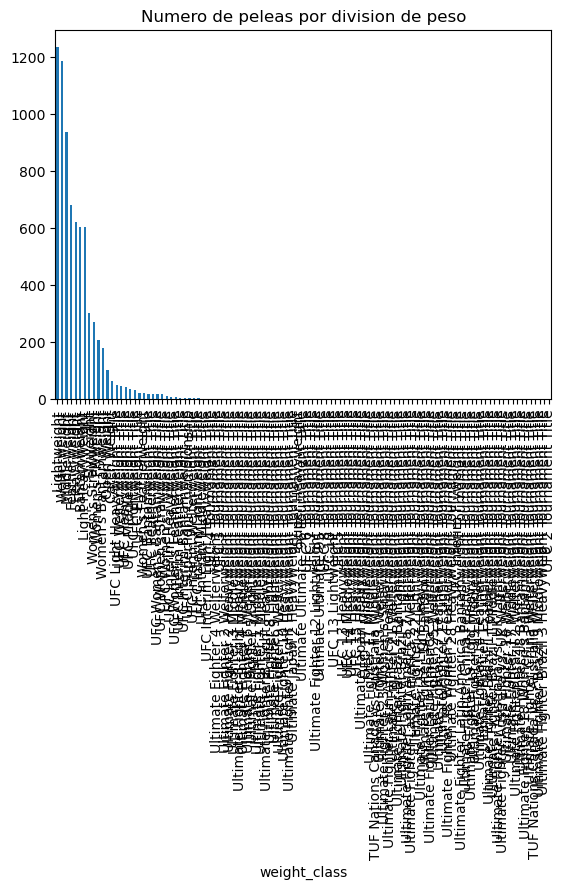

In [4]:
#now we will start by making some graphics about the fights

#first we will make a graphic about the number of fights per weight class
weight_class = fights_stats['weight_class'].value_counts()
weight_class.plot(kind='bar')
#plt.title('Number of fights per weight class')
plt.title('Numero de peleas por division de peso')
plt.show()


In [5]:
#the above graphic has too many categories, so we will select only the most common weight classes
#first we will print the number of fights per weight class
for i in weight_class:
    #we print the name of the weight class and the number of fights
    print(weight_class[weight_class == i])

weight_class
Lightweight    1235
Name: count, dtype: int64
weight_class
Welterweight    1188
Name: count, dtype: int64
weight_class
Middleweight    937
Name: count, dtype: int64
weight_class
Featherweight    683
Name: count, dtype: int64
weight_class
Heavyweight    623
Name: count, dtype: int64
weight_class
Bantamweight    605
Name: count, dtype: int64
weight_class
Light Heavyweight    604
Name: count, dtype: int64
weight_class
Flyweight    302
Name: count, dtype: int64
weight_class
Women's Strawweight    272
Name: count, dtype: int64
weight_class
Women's Flyweight    206
Name: count, dtype: int64
weight_class
Women's Bantamweight    179
Name: count, dtype: int64
weight_class
Open Weight    101
Name: count, dtype: int64
weight_class
Catch Weight    64
Name: count, dtype: int64
weight_class
UFC Light Heavyweight Title    49
Name: count, dtype: int64
weight_class
UFC Welterweight Title    45
Name: count, dtype: int64
weight_class
UFC Heavyweight Title    42
Name: count, dtype: int64
weig

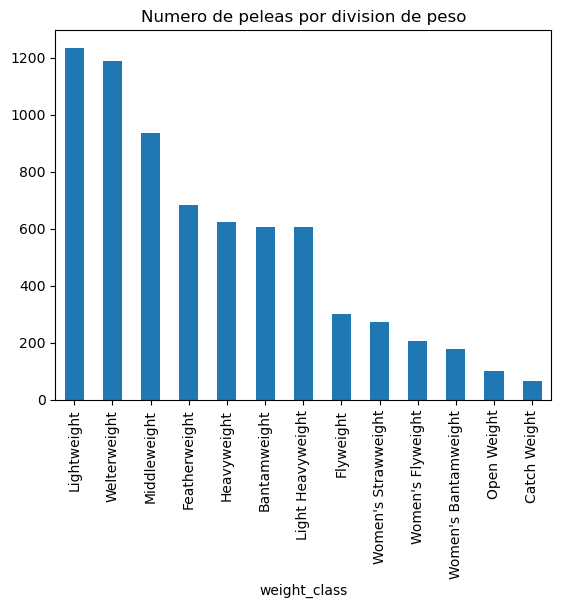

In [6]:
#now we will select the most common weight classes
#according to the above output, we will select the weight classes with more than 50 fights
#we make the selection
weight_class_50 = weight_class[weight_class > 50]
#we plot the new graphic
weight_class_50.plot(kind='bar')
#plt.title('Number of fights per weight class')
plt.title('Numero de peleas por division de peso')
plt.show()

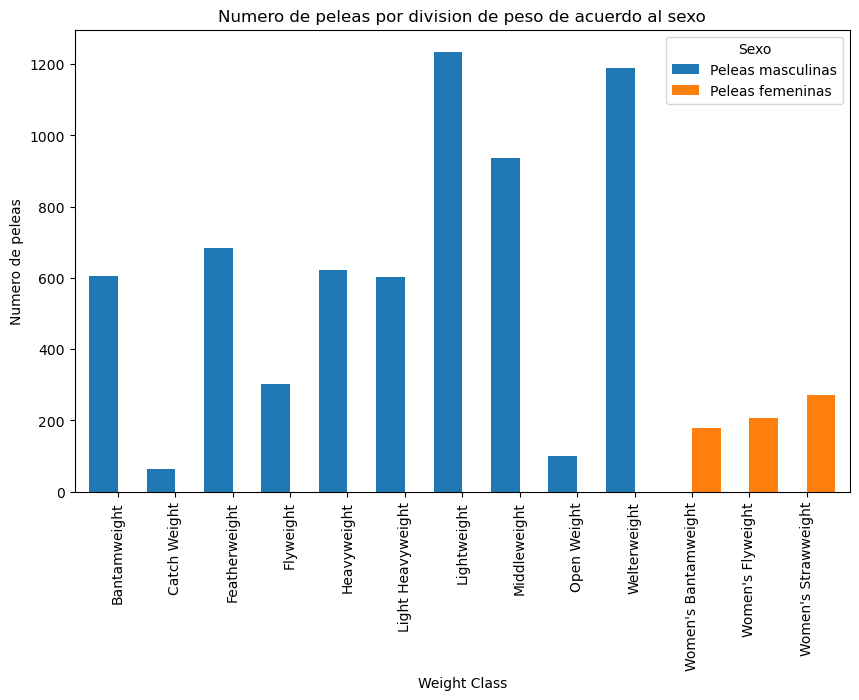

In [7]:
#now we graph the most common weight classes differentiating according to the sex of the fighters
#we read the head of the fights_stats dataset
#print(fights_stats['gender'].head())
'''
0    Women
1      Men
2      Men
3      Men
4      Men
Name: gender, dtype: object
'''
#we make the selection
male_fights = fights_stats[fights_stats['gender'] == 'Men']
female_fights = fights_stats[fights_stats['gender'] == 'Women']

#we filter according to the weight class with more than 50 fights
#for this we will use the names of weight classes found in weight_class_50 and the column 'weight_class'
#we create a list with the names of the weight classes
weight_class_names = weight_class_50.index.tolist()
#we filter male_fights and female_fights
male_fights_50 = male_fights[male_fights['weight_class'].isin(weight_class_names)]
female_fights_50 = female_fights[female_fights['weight_class'].isin(weight_class_names)]

#we plot the new graphic, comparing the number of fights per weight according to the sex of the fighters


# Calculate the number of fights per weight class for male and female fighters
male_fights_count = male_fights_50['weight_class'].value_counts()
female_fights_count = female_fights_50['weight_class'].value_counts()

# Create a DataFrame to hold the counts
fights_count_df = pd.DataFrame({
    'Peleas masculinas': male_fights_count,
    'Peleas femeninas': female_fights_count
}).fillna(0)  # Fill NaN values with 0

# Plot the bar graphs side by side
fights_count_df.plot(kind='bar', figsize=(10, 6), width=1)
#plt.title('Number of Fights per Weight Class by Gender')
plt.title('Numero de peleas por division de peso de acuerdo al sexo')
plt.xlabel('Weight Class')
plt.ylabel('Numero de peleas')
plt.xticks(rotation=90)
plt.legend(title='Sexo')
plt.show()

#### Pregunta 2: ¿Cómo se finalizan las peleas de la UFC?

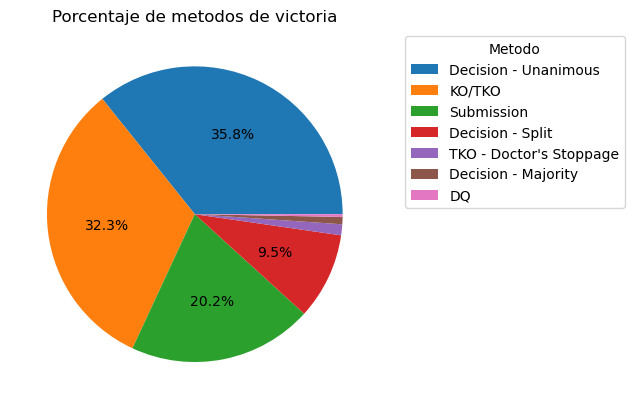

In [8]:
#now we will make a pie chart with the number of fights per method of victory
#we will use a legend to show the name of the method and the percentage of fights that ended with that method
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 2 else ''

method = fights_stats['method'].value_counts()
method.plot(kind='pie', labels=['']*len(method), autopct=autopct_func)  # Add percentage labels to the pie chart
plt.title('Porcentaje de metodos de victoria')
plt.legend(labels=method.index, title='Metodo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Use column names in the legend
plt.ylabel('')
plt.show()

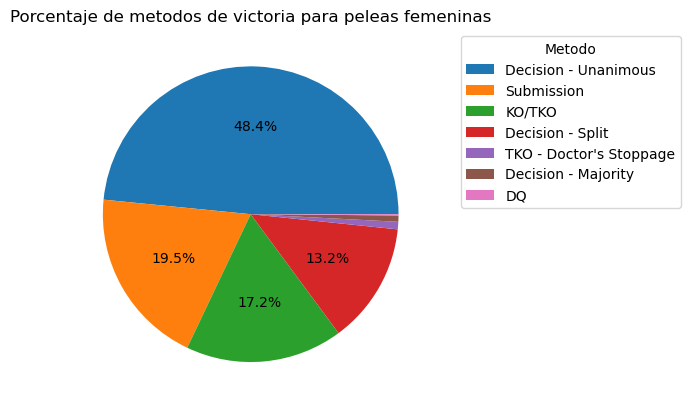

In [9]:
#now we will make the same pie chart but for female fighters
method_f = female_fights['method'].value_counts()
method_f.plot(kind='pie', labels=['']*len(method_f), autopct=autopct_func)  # Add percentage labels to the pie chart
plt.title('Porcentaje de metodos de victoria para peleas femeninas')
plt.legend(labels=method_f.index, title='Metodo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Use column names in the legend
plt.ylabel('')
plt.show()

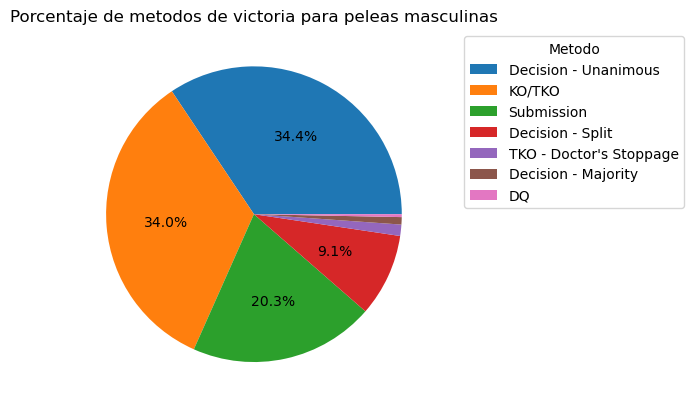

In [10]:
#now we will make the same pie chart but for male fighters
method_m = male_fights['method'].value_counts()
method_m.plot(kind='pie', labels=['']*len(method), autopct=autopct_func)  # Add percentage labels to the pie chart
plt.title('Porcentaje de metodos de victoria para peleas masculinas')
plt.legend(labels=method_m.index, title='Metodo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Use column names in the legend
plt.ylabel('')
plt.show()

#### Pregunta 3: ¿Cómo han ganado el top 10 libra a libra histórico?

In [11]:
#we want to make a profile of the fighters
#for this we will use the fighter_stats dataset
#print(fighter_stats.head())
#we will compute a success rate for each fighter using the columns 'wins' and 'losses'
#for this we will use the beta-binomial model
#we will use the following formula:
#(wins + alpha) / (wins + losses + alpha + beta)
#where alpha and beta are hyperparameters of the model
#we will use alpha = average wins and beta = average losses
alpha = fighter_stats['wins'].mean()
print('alpha:', alpha)
beta = fighter_stats['losses'].mean()
print('beta:', beta)
fighter_stats['success_rate'] = (fighter_stats['wins'] + alpha) / (fighter_stats['losses'] + beta)
#print(fighter_stats.head())
#we sort the fighters by success rate
fighter_stats_ranked = fighter_stats.sort_values('success_rate', ascending=False)
#we print the top 10 fighters
print(fighter_stats_ranked.head(10))


alpha: 14.39911218724778
beta: 6.11138014527845
                     name  wins  losses  height  weight   reach    stance  \
945   Khabib Nurmagomedov  29.0     0.0  177.80   70.31  177.80  Orthodox   
639             Jon Jones  27.0     1.0  193.04  112.49  213.36  Orthodox   
365       Islam Makhachev  25.0     1.0  177.80   70.31  177.80  Southpaw   
207         Movsar Evloev  18.0     0.0  170.18   65.77  182.88  Orthodox   
247     Shavkat Rakhmonov  18.0     0.0  185.42   77.11  195.58  Orthodox   
655      Khusein Askhabov  23.0     1.0  172.72   65.77  175.26  Orthodox   
84      Umar Nurmagomedov  17.0     0.0  172.72   61.23  175.26  Orthodox   
1954           Sean Sherk  36.0     4.0  167.64   70.31  170.18  Orthodox   
1255    Georges St-Pierre  26.0     2.0  180.34   83.91  193.04  Orthodox   
551    Rinat Fakhretdinov  21.0     1.0  182.88   77.11  187.96  Orthodox   

       age  SLpM  sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  \
945   35.0  4.10       

In [12]:
#we will make a graphic with the top 10 fighters and their finalization methods
top_10_fighters = fighter_stats_ranked.head(10)
#we will select only the fights of the top 10 fighters in the fights_stats dataset
top_10_fights_r = fights_stats[fights_stats['r_fighter'].isin(top_10_fighters['name'])]
top_10_fights_b = fights_stats[fights_stats['b_fighter'].isin(top_10_fighters['name'])]

#we will add the two dataframes filtering according to the winner of the fight 'winner', select the columns 'method' and selecting and renaming the columns 'r_fighter' and 'b_fighter' to 'name'

# Rename the columns to have a common name column
top_10_fights_r = top_10_fights_r.rename(columns={'r_fighter': 'name'})
top_10_fights_b = top_10_fights_b.rename(columns={'b_fighter': 'name'})

# Concatenate the dataframes
top_10_wins = pd.concat([top_10_fights_r[top_10_fights_r['winner'] == 'Red'], top_10_fights_b[top_10_fights_b['winner'] == 'Blue']])
top_10_losses = pd.concat([top_10_fights_r[top_10_fights_r['winner'] == 'Blue'], top_10_fights_b[top_10_fights_b['winner'] == 'Red']])

print(top_10_wins)
print(top_10_losses)


                                   event_name                 name  \
42    UFC Fight Night: Rozenstruik vs. Gaziev    Umar Nurmagomedov   
124            UFC 296: Edwards vs. Covington    Shavkat Rakhmonov   
191      UFC 294: Makhachev vs. Volkanovski 2      Islam Makhachev   
450              UFC 288: Sterling vs. Cejudo        Movsar Evloev   
543                   UFC 285: Jones vs. Gane            Jon Jones   
...                                       ...                  ...   
5304            UFC on FX: Belfort vs Bisping  Khabib Nurmagomedov   
5464               UFC 148: Silva vs Sonnen 2  Khabib Nurmagomedov   
5629            UFC on FX: Guillard vs Miller  Khabib Nurmagomedov   
5874                 UFC 128: Shogun vs Jones            Jon Jones   
6138                  UFC Live: Vera vs Jones            Jon Jones   

                  b_fighter winner                 weight_class  \
42          Bekzat Almakhan    Red                 Bantamweight   
124        Stephen Thomps

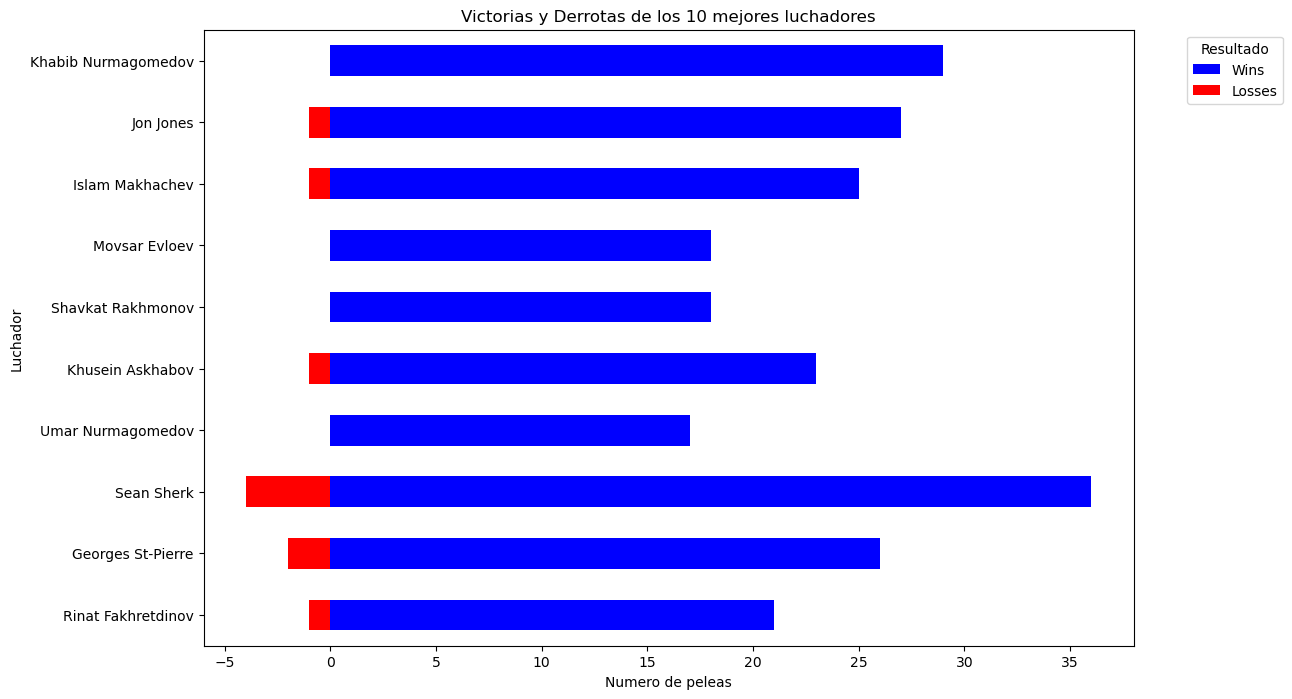

In [13]:
#we will make the same graphic but using only the results of the top 10 fighters "top_10_fighters" we dont take into account method of victory, just wins and loses

# Extract the wins and losses for the top 10 fighters
win_counts = top_10_fighters.set_index('name')['wins']
loss_counts = top_10_fighters.set_index('name')['losses']

# Create a DataFrame to hold the counts
counts_df = pd.DataFrame({
    'Wins': win_counts,
    'Losses': -loss_counts  # Negative for losses to show on the left
}).fillna(0)

# Reindex the DataFrame to match the order of top_10_fighters, backwards
counts_df = counts_df.reindex(index=top_10_fighters['name'][::-1])

# Plot the stacked bar chart horizontally
fig, ax = plt.subplots(figsize=(12, 8))
counts_df.plot(kind='barh', stacked=True, ax=ax, color=['blue', 'red'])

# Customize the plot
plt.title('Victorias y Derrotas de los 10 mejores luchadores')
plt.xlabel('Numero de peleas')
plt.ylabel('Luchador')
plt.legend(title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

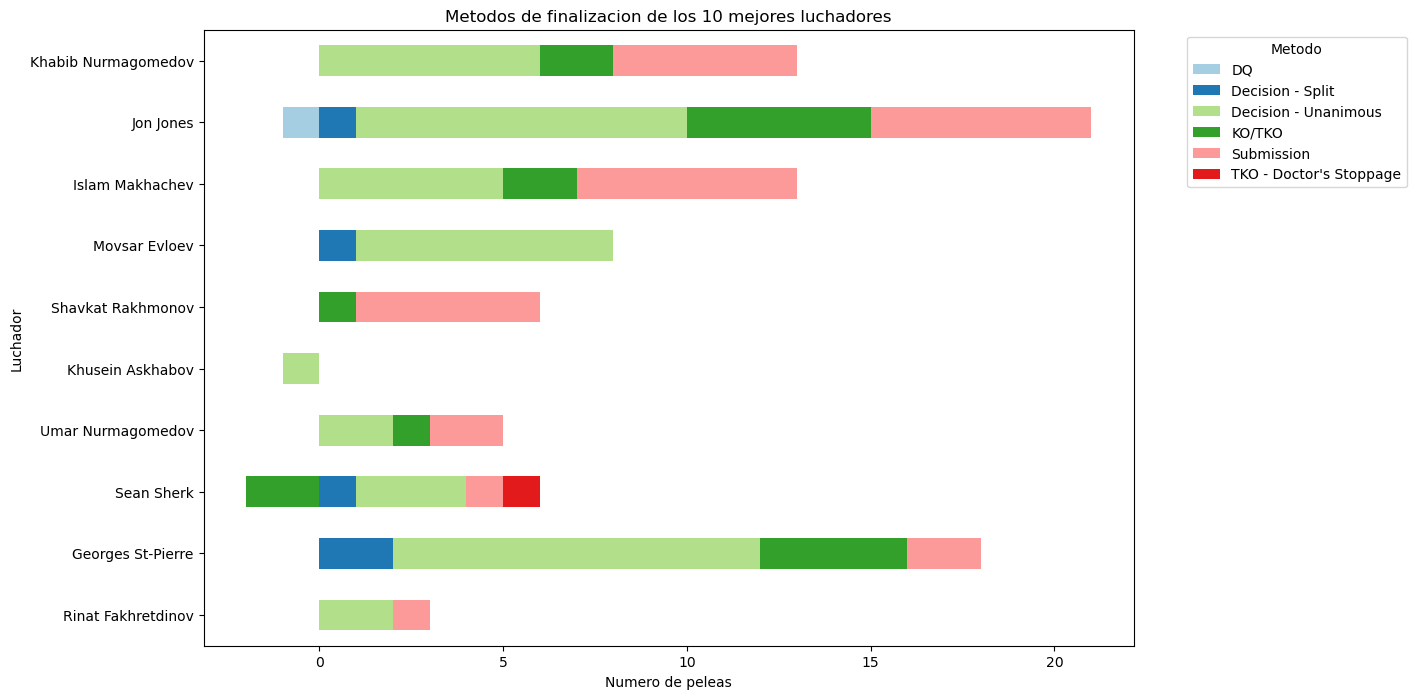

In [14]:
#we will show the finalization methods of the top 10 fighters using a stacked bar chart with wins on the right and losses on the left
#we will use the method column of the top_10_wins and top_10_losses ranking according to the order stored in top_10_fighters

# Aggregate the counts of each finalization method for wins and losses
win_methods = top_10_wins.groupby(['name', 'method']).size().unstack(fill_value=0)
loss_methods = top_10_losses.groupby(['name', 'method']).size().unstack(fill_value=0)

# Ensure all methods are present in both DataFrames
all_methods = win_methods.columns.union(loss_methods.columns)
win_methods = win_methods.reindex(columns=all_methods, fill_value=0)
loss_methods = loss_methods.reindex(columns=all_methods, fill_value=0)

# Create a DataFrame to hold the counts
methods_df = pd.concat([win_methods, -loss_methods], keys=['Wins', 'Losses'], axis=1).fillna(0)

# Reindex the DataFrame to match the order of top_10_fighters, backwards
methods_df = methods_df.reindex(index=top_10_fighters['name'][::-1])

# Combine Wins and Losses into a single DataFrame for plotting
combined_methods_df = methods_df['Wins'].add(methods_df['Losses'], fill_value=0)

# Plot the stacked bar chart horizontally
fig, ax = plt.subplots(figsize=(12, 8))
combined_methods_df.plot(kind='barh', stacked=True, ax=ax, color=plt.cm.Paired.colors[:len(all_methods)])

# Customize the plot
plt.title('Metodos de finalizacion de los 10 mejores luchadores')
plt.xlabel('Numero de peleas')
plt.ylabel('Luchador')
plt.legend(title='Metodo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

                     name  wins  losses  height  weight   reach    stance  \
945   Khabib Nurmagomedov  29.0     0.0  177.80   70.31  177.80  Orthodox   
639             Jon Jones  27.0     1.0  193.04  112.49  213.36  Orthodox   
365       Islam Makhachev  25.0     1.0  177.80   70.31  177.80  Southpaw   
207         Movsar Evloev  18.0     0.0  170.18   65.77  182.88  Orthodox   
247     Shavkat Rakhmonov  18.0     0.0  185.42   77.11  195.58  Orthodox   
655      Khusein Askhabov  23.0     1.0  172.72   65.77  175.26  Orthodox   
84      Umar Nurmagomedov  17.0     0.0  172.72   61.23  175.26  Orthodox   
1954           Sean Sherk  36.0     4.0  167.64   70.31  170.18  Orthodox   
1255    Georges St-Pierre  26.0     2.0  180.34   83.91  193.04  Orthodox   
551    Rinat Fakhretdinov  21.0     1.0  182.88   77.11  187.96  Orthodox   

       age  SLpM  sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  \
945   35.0  4.10         0.48  1.75     0.65    5.32    0.48    0.84   

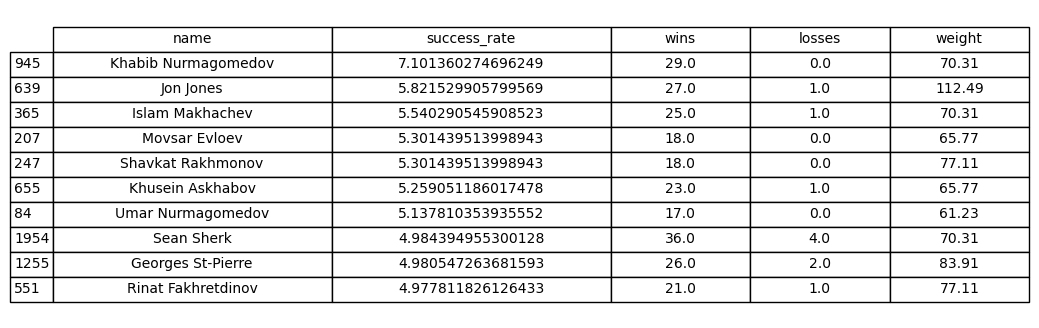

In [15]:
print(top_10_fighters)
#we want to make a table with the top 10 fighters, showing the columns name, success_rate, wins, losses and weight

# Assuming top_10_fighters_table is already defined
top_10_fighters_table = top_10_fighters[['name', 'success_rate', 'wins', 'losses', 'weight']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust the size as needed

# Hide the axis
ax.axis('off')

# Create the table with individual column widths
col_widths = [0.2, 0.2, 0.1, 0.1, 0.1]  # Adjust these values as needed
table = pd.plotting.table(ax, top_10_fighters_table, loc='center', cellLoc='center', colWidths=col_widths)

# Adjust the table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

# Save the figure as an image
plt.savefig('top_10_fighters_table.png', bbox_inches='tight', pad_inches=0.1)

# Show the plot (optional)
plt.show()

## Preguntas hito 2.

1. ¿Cómo varía la nueva métrica de clasificación entre las diferentes divisiones de peso en comparación con Elo?
2. ¿Cómo se compara la nueva métrica de clasificación con la metrica Elo a la hora de predecir los resultados de los combates de la UFC?
3. ¿En qué medida predicen Elo y la nueva métrica de clasificación los favoritos en las apuestas, y cómo se alinean sus predicciones con los resultados reales de los combates?
4. ¿Cómo se comparan las métricas de clasificación y Elo en términos de precisión y sensibilidad?



/home/hd/Documents/U/2024-2/visualizacion/entrega-final/data/elo/masterMLpublic.csv
